<a href="https://colab.research.google.com/github/BachokunIAR/electriccity_price_prediction/blob/main/Copy_of_smart_home__device_usage_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns



In [ ]:
from google.colab import files
files.upload_file = files.upload()

Saving smart_home_device_usage_data.csv to smart_home_device_usage_data.csv


In [ ]:
! ls


sample_data  smart_home_device_usage_data.csv


In [ ]:
df = pd.read_csv("smart_home_device_usage_data.csv")
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [ ]:
df['SmartHomeEfficiency'].unique()

array([1, 0])

In [ ]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [ ]:
df.isna().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

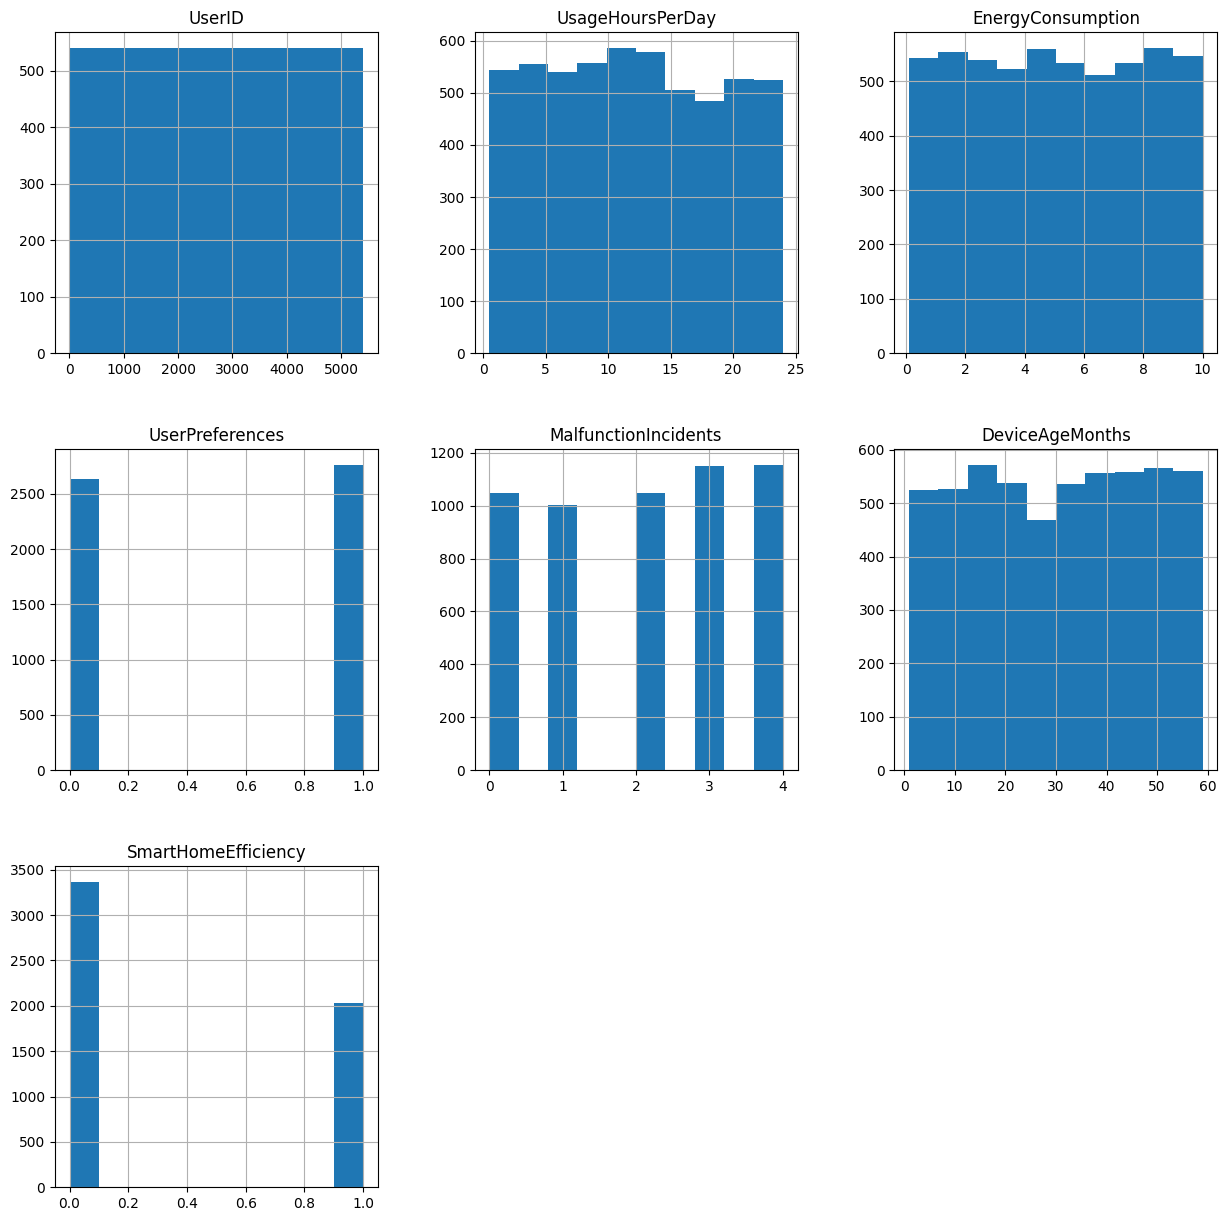

In [ ]:
# Making histogram of the data

plt.rcParams['figure.figsize'] = [15, 15]
df.hist();

In [ ]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['UserID']
col_numerical = [e for e in num_col if e not in remove_list]

In [ ]:
categorical_col = []
for m, n in df.items():
  if n.dtype == 'object':
    categorical_col.append(m)

print(categorical_col)

['DeviceType']


In [ ]:
df['DeviceType'].unique()

array(['Smart Speaker', 'Camera', 'Security System', 'Thermostat',
       'Lights'], dtype=object)

In [ ]:
device_to_num = {'Smart Speaker': 0,
                 'Camera':1,
                 'Security System': 2,
                 'Thermostat': 3,
                'Lights':4 }

df['DeviceType'] = df['DeviceType'].map(device_to_num)


In [ ]:
# Findin the correlation between the data
df.corr()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
UserID,1.000000,-0.013999,-0.011917,-0.011776,0.019672,-0.009663,0.000164,0.043975
DeviceType,-0.013999,1.000000,0.002924,0.020261,-0.007235,0.001730,-0.007254,-0.015002
UsageHoursPerDay,-0.011917,0.002924,1.000000,0.026253,0.002161,0.015126,0.025132,0.183065
EnergyConsumption,-0.011776,0.020261,0.026253,1.000000,0.016709,-0.000894,-0.016691,-0.178467
UserPreferences,0.019672,-0.007235,0.002161,0.016709,1.000000,0.002154,-0.013781,0.608713
MalfunctionIncidents,-0.009663,0.001730,0.015126,-0.000894,0.002154,1.000000,-0.027023,-0.120836
DeviceAgeMonths,0.000164,-0.007254,0.025132,-0.016691,-0.013781,-0.027023,1.000000,-0.197077
SmartHomeEfficiency,0.043975,-0.015002,0.183065,-0.178467,0.608713,-0.120836,-0.197077,1.000000


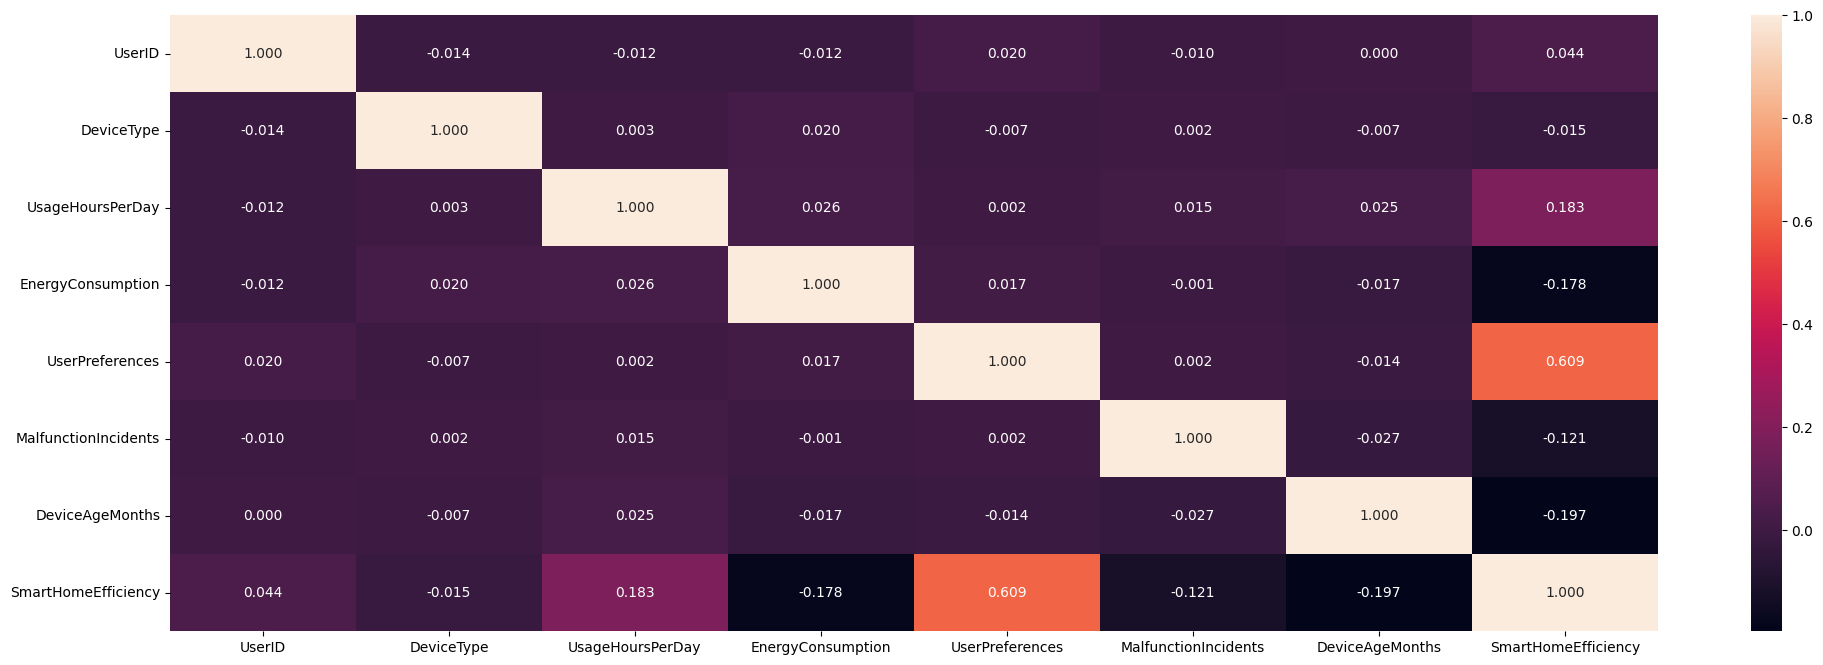

In [ ]:
# making a heatmap of the data

plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, fmt = '.3f');

In [ ]:
x = df.drop(['UserID','SmartHomeEfficiency'], axis=1)
y = df['SmartHomeEfficiency']

In [ ]:
x.shape, y.shape

((5403, 6), (5403,))

# Turning the data into Tensors and create train and test split

In [ ]:
x = torch.from_numpy(np.asarray(x)).type(torch.float)
y = torch.from_numpy(np.asarray(y)).type(torch.float)
x[:5], y[:5]

(tensor([[ 0.0000, 15.3072,  1.9616,  1.0000,  4.0000, 36.0000],
         [ 1.0000, 19.9733,  8.6107,  1.0000,  0.0000, 29.0000],
         [ 2.0000, 18.9115,  2.6518,  1.0000,  0.0000, 20.0000],
         [ 1.0000,  7.0111,  2.3417,  0.0000,  3.0000, 15.0000],
         [ 1.0000, 22.6107,  4.8591,  1.0000,  3.0000, 36.0000]]),
 tensor([1., 1., 1., 0., 1.]))

# <font color = red> Splitting data into train and test data sets

In [ ]:

train_split = int(0.8*len(x)) # 80 % of the data will be use for training set and 20 % for test set
xtrain, ytrain = x[:train_split],y[:train_split]
xtest, ytest = x[train_split:],y[train_split:]

len(xtrain), len(ytrain), len(xtest), len(ytest)

(4322, 4322, 1081, 1081)

In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain, xtest, ytrain, ytest =  train_test_split(x,y , test_size = 0.3,
#                                                  random_state=42)

In [ ]:
# # This function is to create visualization of the data

# def plot_predictions(train_data = xtrain,
#                      train_labels = ytrain,
#                      test_data =  xtest,
#                      test_labels = ytest,
#                      predictions =None):
#   """
#   Plots training data, test data and compares prediction.
#   """

#   plt.figure(figsize = (10,7))
#   # plot trainning data in red
#   plt.scatter(train_data, train_labels, c ='r', s=5, label = 'Training data')
#   # plot test data in green
#   plt.scatter(test_data, test_labels, c= 'g', s=5, label = 'Test data')

#   # plot test data in blue

#   if predictions is not None:
#     # plot the prediction in blue
#     plt.scatter(test_data, predictions, c='b', s=5, label = 'Predictions')
#     # show the legend
#     plt.legend(prop ={'size':14});

#<font color =red> Building model

In [ ]:
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.layer_1 = torch.nn.Linear(in_features= 6, out_features= 60)
    self.layer_2 = torch.nn.Linear(in_features= 60, out_features=30)
    self.layer_3 = torch.nn.Linear(in_features= 30, out_features=15)
    self.layer_4 = torch.nn.Linear(in_features= 15, out_features=5)
    self.layer_5 = torch.nn.Linear(in_features= 5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    outputs = self.layer_5(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2
     (self.relu(self.layer_1(x))))))))
    # outputs = self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2
    #  (self.relu(self.layer_1(x)))))))


    return outputs

model_1 = LogisticRegression().to(device)
model_1

LogisticRegression(
  (layer_1): Linear(in_features=6, out_features=60, bias=True)
  (layer_2): Linear(in_features=60, out_features=30, bias=True)
  (layer_3): Linear(in_features=30, out_features=15, bias=True)
  (layer_4): Linear(in_features=15, out_features=5, bias=True)
  (layer_5): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Make predictions with the model
untrained_preds = model_1(xtest.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(ytest)}, Shape: {ytest.shape}")
print(f"\nFirst 11 predictions:\n{untrained_preds[:11]}")
print(f"\nFirst 11 test labels:\n{ytest[:11]}")

Length of predictions: 1081, Shape: torch.Size([1081, 1])
Length of test samples: 1081, Shape: torch.Size([1081])

First 11 predictions:
tensor([[-0.1814],
        [-0.1692],
        [-0.5046],
        [-0.7074],
        [-0.7263],
        [-0.7996],
        [-0.1500],
        [-0.1583],
        [-0.7409],
        [-0.7070],
        [-0.1684]], device='cuda:0', grad_fn=<SliceBackward0>)

First 11 test labels:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


#<font color = red> Setting up loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # smae as sigmoid loss function
# creating optimizer
optimizer = torch.optim.Adam(params= model_1.parameters(),
                             lr = 0.001)

In [ ]:
def accuracy_fnn(ytrue, y_pred):
  correct = torch.eq(ytrue,y_pred).sum().item() # torch.eq() calculates where two tensors are equa;
  acc = (correct/len(y_pred))*100

  return acc

#<font color = red> Model Training

In [ ]:
y_logits = model_1(xtest.to(device))[:5]
y_logits

tensor([[-0.1814],
        [-0.1692],
        [-0.5046],
        [-0.7074],
        [-0.7263]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4548],
        [0.4578],
        [0.3765],
        [0.3302],
        [0.3260]], device='cuda:0', grad_fn=<SigmoidBackward0>)

#<font color = red> Building a training and testing loop

In [ ]:
torch.manual_seed(42)

epochs = 5000 # setting the number of epochs

train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []
epoch_count = []


xtrain, ytrain = xtrain.to(device),ytrain.to(device)

xtest, ytest = xtest.to(device), ytest.to(device)

# Buildin the training and evaluation
for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass (model outputs raw logits)
  y_logits = model_1(xtrain).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls


  # 2. calculate the loss/accuracy
  loss = loss_fn(y_logits, ytrain)
  training_acc = accuracy_fnn(ytrue = ytrain, y_pred = y_pred)
  # testing_acc = accuracy_fnn(y)

  optimizer.zero_grad() # 3. Optimizer zero grad

  loss.backward() # 4. Losss backwards
  # 5. optimizer step
  optimizer.step()
  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(xtest).squeeze()
    test_pred  =  torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/acuracy
    test_loss = loss_fn(test_logits, ytest)
    test_acc = accuracy_fnn(ytrue = ytest,
                            y_pred = test_pred)

    # Print out results after every 10 epochs
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      #train_loss_values.appen(loss.detach().numpy())
      #tesy_loss_values.append(test_loss.detach().numpy())
      test_accuracy_values.append(test_acc)
      train_accuracy_values.append(training_acc)
      print(f"Epoch: {epoch} || Loss: {loss:.3f},\
      Accuracy: {training_acc:.3f}% || Test loss: {test_loss:.3f}, Test acc: {test_acc:.3f}%")


Epoch: 0 || Loss: 0.633,      Accuracy: 63.697% || Test loss: 0.675, Test acc: 56.892%
Epoch: 10 || Loss: 0.604,      Accuracy: 65.340% || Test loss: 0.681, Test acc: 58.557%
Epoch: 20 || Loss: 0.589,      Accuracy: 67.538% || Test loss: 0.690, Test acc: 60.407%
Epoch: 30 || Loss: 0.573,      Accuracy: 68.672% || Test loss: 0.692, Test acc: 59.759%
Epoch: 40 || Loss: 0.557,      Accuracy: 69.713% || Test loss: 0.698, Test acc: 58.742%
Epoch: 50 || Loss: 0.538,      Accuracy: 71.124% || Test loss: 0.702, Test acc: 60.130%
Epoch: 60 || Loss: 0.508,      Accuracy: 74.734% || Test loss: 0.687, Test acc: 61.980%
Epoch: 70 || Loss: 0.459,      Accuracy: 79.338% || Test loss: 0.671, Test acc: 64.662%
Epoch: 80 || Loss: 0.386,      Accuracy: 85.493% || Test loss: 0.652, Test acc: 69.473%
Epoch: 90 || Loss: 0.304,      Accuracy: 90.329% || Test loss: 0.663, Test acc: 71.785%
Epoch: 100 || Loss: 0.236,      Accuracy: 91.925% || Test loss: 0.743, Test acc: 72.895%
Epoch: 110 || Loss: 0.197,      

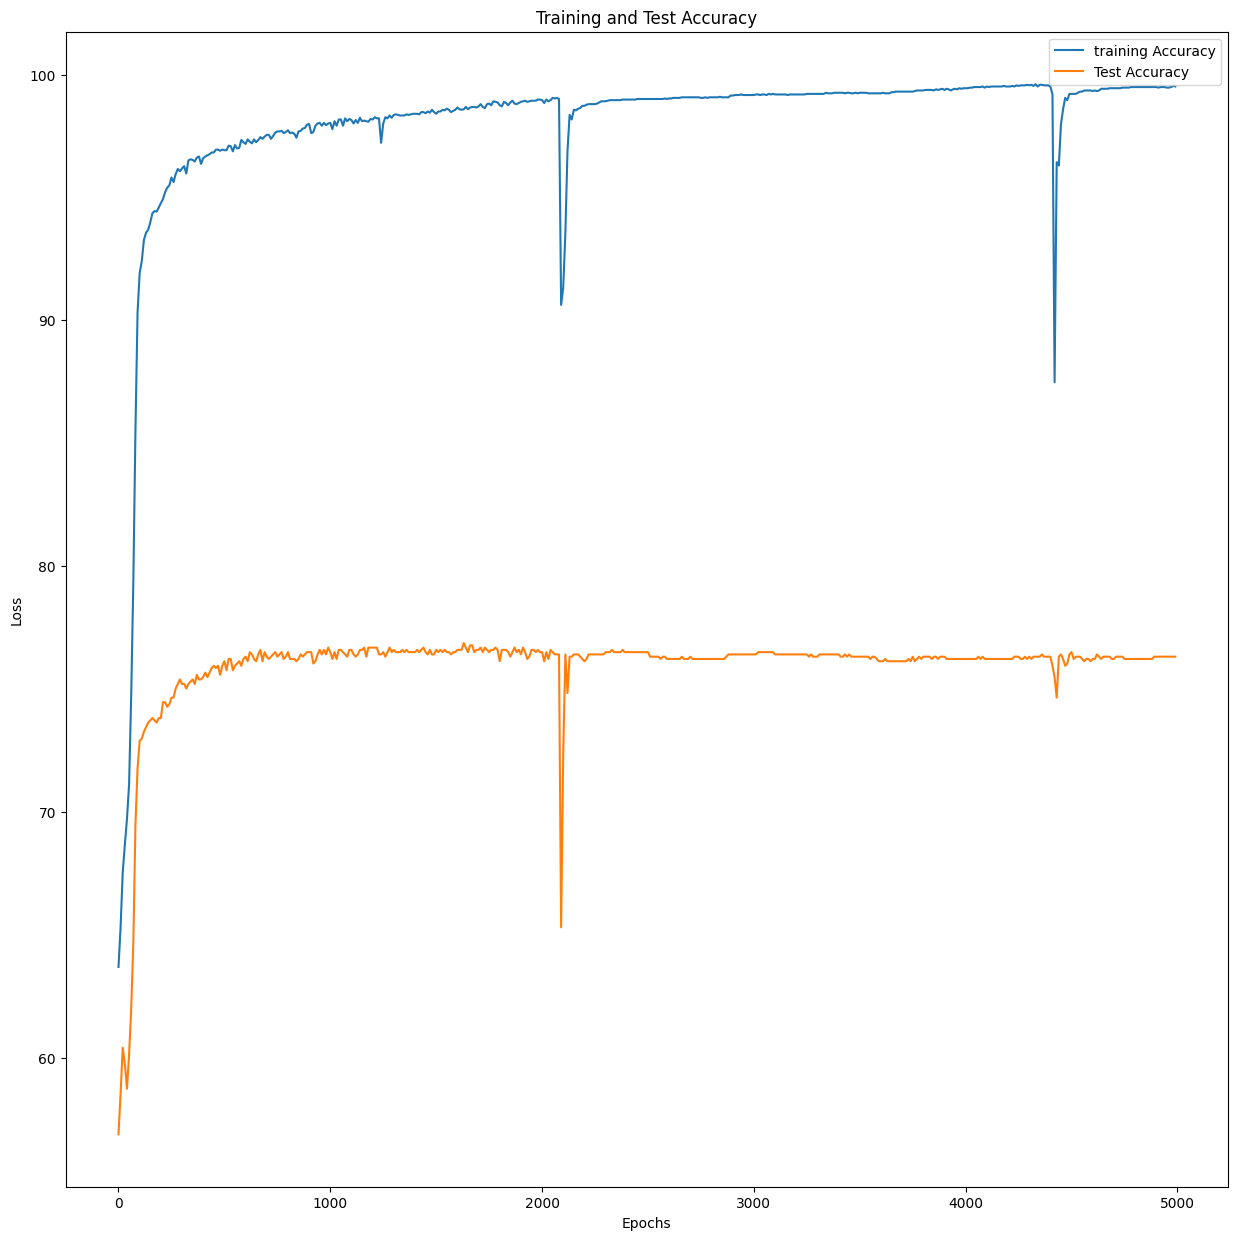

In [ ]:
plt.plot(epoch_count,train_accuracy_values,label='training Accuracy')
plt.plot(epoch_count,test_accuracy_values,label='Test Accuracy')
##plt.plot(epoch,test_acc.cpu().data.numpy().argmax() ,label = 'Test loss');
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# input_data = ()
# input_data_np =np.asarray(input_data)
# input_data_re = input_data_np.reshape(1,-1)
# pred knn.predict(input_data_re)

# print(pred)
# if(pred[0]==0):
#   print('The cancer stage is benighn')

# else:
#   print('The cancer stage is malignant ')